# Binary classification of IMDB

## First, Load dataset and check the data
The parameter 'num_words' decides take how many the most common words into consideration.

In [2]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)
train_data.shape,train_labels.shape,test_data.shape,test_labels.shape
train_data[0],train_labels[0]

Using TensorFlow backend.


([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  2,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  2,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447,
  4,
  192,
  50,
  16,
  6,
  147,
  2025,
  19,
  14,
  22,
  4,
  1920,
  4613,
  469,
  4,
  22,
  71,
  87,
  12,
  16,
  43,
  530,
  38,
  76,
  15,
  13,
  1247,
  4,
  22,
  17,
  515,
  17,
  12,
  16,
  626,
  18,
  2,
  5,
  62,
  386,
  12,
  8,
  316,
  8,
  106,
  5,
  4,
  2223,
  5244,
  16,
  480,
  66,
  3785,
  33,
  4,
  130,
  12,
  16,
  38,
  619,
  5,
  25,
  124,
  51,
  36,
  135,
  48,
  25,
  1415,
  33,
  6,
  22,
  12,
  215,
  28,
  77,
  52,
  5,
  14,
  407,
  16,
  82,
  2,
  8,
  4,
  107,
  117,
  5952,
  15,
  256,
  4,
  2,
  7,
  3766,
  5,
  723,
  36,
  71,
  43,
  530,
  476,
  26,
  400,
  317,
  46,
  7,
  4,
  2,
  1029,
  

# Second, get the dictionary and reverse it.

Attention! The dictionary's key-value is word-index, so reverse it to get index-word.

In [13]:
dic=imdb.get_word_index()##nice network connection

rev_dic=dict([(v,k) for (k,v) in dic.items()])

decoded_review=' '.join([rev_dic.get(i-3,'?') for i in train_data[1]])
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

# Turn data into one-hot vectors

In [15]:
import numpy as np
def vectorize(sequences,dim=10000):
    results=np.zeros((len(sequences),dim))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results
x_train=vectorize(train_data)
x_test=vectorize(test_data)
x_train[1]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

# Turn the label into scalar

In [16]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")
y_train[0]

1.0

# Next, build the network's architecture and compile it

In [40]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [41]:
x_val=x_train[:10000];y_val=y_train[:10000]
x_train_part=x_train[10000:];y_train_part=y_train[10000:]

# Training 

In [42]:
history=model.fit(x_train_part,y_train_part,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.4741 - acc: 0.7827 - val_loss: 0.3211 - val_acc: 0.8838
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2649 - acc: 0.9040 - val_loss: 0.2876 - val_acc: 0.8879
Epoch 3/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1854 - acc: 0.9362 - val_loss: 0.3103 - val_acc: 0.8770
Epoch 4/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1441 - acc: 0.9491 - val_loss: 0.3088 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1064 - acc: 0.9623 - val_loss: 0.3384 - val_acc: 0.8778
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.0865 - acc: 0.9704 - val_loss: 0.3517 - val_acc: 0.8825
Epoch 7/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0582 - acc: 0.9819 - val_loss: 0.3916 - 

# Plotting training history

In [43]:
history_dic=history.history

In [44]:
history_dic.keys()

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
val_l=history_dic["val_loss"];l=history_dic["loss"];val_acc=history_dic["val_acc"];acc=history_dic["acc"]
epochs=np.arange(1,21)

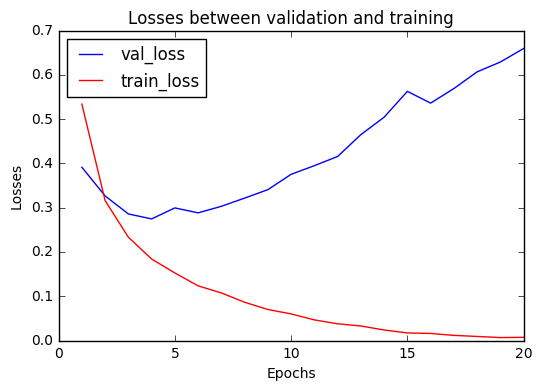

In [37]:
plt.plot(epochs,val_l,"b",label="val_loss")
plt.plot(epochs,l,"r",label="train_loss")
plt.title("Losses between validation and training")
plt.xlabel("Epochs");plt.ylabel("Losses")
plt.legend(loc="best")
plt.show()

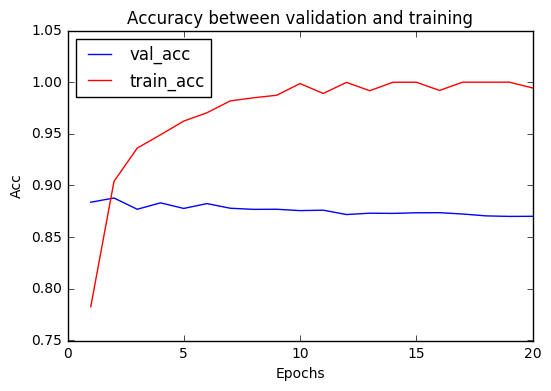

In [46]:
plt.plot(epochs,val_acc,"b",label="val_acc")
plt.plot(epochs,acc,"r",label="train_acc")
plt.title("Accuracy between validation and training")
plt.xlabel("Epochs");plt.ylabel("Acc")
plt.legend(loc="best")
plt.show()

# Evaluate model

In [47]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 125us/step


[0.99473489139080051, 0.85116000000000003]